# **AI4DRM**: **Introdution to Neuralhydrology**
----
**Author**: **Siddik Barbhuiya**

**Email:**: siddikbarbhuiya@gmail.com

**Website**:https://barbhuiya12.github.io/




---


## Workshop Overview
This comprehensive workshop covers:
1. Understanding the CAMELS Dataset (Forcing & Attributes)
2. Exploring Available Models in NeuralHydrology
3. Single Basin Training, Validation & Evaluation
4. Multi-Basin Training, Validation & Evaluation


# Part 1: Understanding the CAMELS Dataset

## What is CAMELS?
CAMELS (Catchment Attributes and MEteorology for Large-sample Studies) is a standardized hydrological dataset containing:
- **Forcing (Dynamic) Data**: Time-series meteorological inputs
- **Static Attributes**: Catchment characteristics that don't change over time
- **Streamflow Observations**: Target variable for rainfall-runoff modeling

## A. Forcing Data (Dynamic Inputs)
These are the **time-varying** meteorological variables that drive the hydrological cycle.

### Available Forcing Products:
- **Daymet**: Daily surface weather data on a 1-km grid
- **Maurer**: 1/8° gridded meteorological forcing
- **Maurer Extended**: Maurer + additional variables
- **NLDAS**: North American Land Data Assimilation System
- **NLDAS Hourly**: High temporal resolution

### Common Forcing Variables:
| Variable | Unit | Description |
|----------|------|-------------|
| `prcp(mm/day)` | mm/day | Precipitation (rainfall + snowfall) |
| `tmax(C)` | °C | Maximum daily temperature |
| `tmin(C)` | °C | Minimum daily temperature |
| `srad(W/m2)` | W/m² | Solar radiation |
| `vp(Pa)` | Pa | Vapor pressure |
| `dayl(s)` | seconds | Day length |

## B. Static Attributes
These describe the **physical characteristics** of each catchment and remain constant over time. They are grouped into categories:

### 1. Topography (`camels_topo.txt`)
- `elev_mean`: Mean elevation (m)
- `slope_mean`: Mean slope (m/km)
- `area_gages2`: Catchment area (km²)

### 2. Climate (`camels_clim.txt`)
- `p_mean`: Mean daily precipitation (mm/day)
- `pet_mean`: Mean potential evapotranspiration (mm/day)
- `aridity`: Aridity index (PET/P)
- `frac_snow`: Fraction of precipitation falling as snow
- `high_prec_freq`, `high_prec_dur`: High precipitation frequency & duration

### 3. Soil (`camels_soil.txt`)
- `soil_depth_pelletier`: Depth to bedrock (m)
- `soil_porosity`: Volumetric porosity
- `soil_conductivity`: Saturated hydraulic conductivity (cm/hr)
- `sand_frac`, `silt_frac`, `clay_frac`: Soil texture fractions

### 4. Vegetation (`camels_vege.txt`)
- `frac_forest`: Forest fraction
- `lai_max`: Maximum Leaf Area Index
- `lai_diff`: Difference between max and min LAI
- `gvf_max`, `gvf_diff`: Green Vegetation Fraction

### 5. Geology (`camels_geol.txt`)
- `carbonate_rocks_frac`: Fraction of carbonate rocks
- `geol_permeability`: Subsurface permeability (m²)

### 6. Hydrology (`camels_hydro.txt`)
- `q_mean`: Mean discharge (mm/day)
- `runoff_ratio`: Runoff ratio (Q/P)
- `baseflow_index`: Baseflow index

---
**See the paper**


Newman, A. J., Clark, M. P., Sampson, K., Wood, A., Hay, L. E., Bock, A., Viger, R. J., Blodgett, D., Brekke, L., Arnold, J. R., Hopson, T., and Duan, Q.: Development of a large-sample watershed-scale hydrometeorological data set for the contiguous USA: data set characteristics and assessment of regional variability in hydrologic model performance, Hydrol. Earth Syst. Sci., 19, 209–223, https://doi.org/10.5194/hess-19-209-2015, 2015.

Mangukiya, N. K., Kumar, K. B., Dey, P., Sharma, S., Bejagam, V., Mujumdar, P. P., & Sharma, A. (2025). CAMELS-IND: hydrometeorological time series and catchment attributes for 228 catchments in Peninsular India. Earth System Science Data, 17(2), 461–491. https://doi.org/10.5194/essd-17-461-2025

# Part 2: Available Models in NeuralHydrology

NeuralHydrology provides a rich **Model Zoo** with state-of-the-art architectures:
| Model Category        | Model Name               |
|-----------------------|--------------------------|
| Standard RNN Models   | CudaLSTM                 |
|                       | CustomLSTM               |
|                       | GRU                      |
| Enhanced LSTM Variants| EALSTM                   |
|                       | MCLSTM                   |
| Multi-Timescale Models| MTSLSTM                  |
|                       | ODELSTM                  |
| Attention-Based Models| Transformer              |
| Modern Architectures  | Mamba                    |
|                       | XLSTM                    |
| Hybrid & Forecasting Models | HybridModel            |
|                       | SequentialForecastLSTM   |
|                       | MultiHeadForecastLSTM    |
|                       | StackedForecastLSTM      |

**See the papers:**

Barbhuiya, S., & Gupta, V. (2025). From gauged to ungauged: Large-scale deep learning rainfall-runoff modelling for reliable streamflow estimation in India’s diverse basins. Environmental Modelling & Software, 194, 106696. https://doi.org/10.1016/j.envsoft.2025.106696




# Part 3: Setup & Data Inspection


In [22]:
# Clone and install NeuralHydrology
!git clone https://github.com/neuralhydrology/neuralhydrology
%cd neuralhydrology
!pip install -e .


fatal: destination path 'neuralhydrology' already exists and is not an empty directory.
/content/neuralhydrology/neuralhydrology
Obtaining file:///content/neuralhydrology/neuralhydrology
ERROR: file:///content/neuralhydrology/neuralhydrology does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [23]:
## Mounting G-drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torch
import yaml
from neuralhydrology.nh_run import start_run, eval_run

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cuda:0


## Inspect Forcing Data


In [25]:
data_dir = Path("/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/CAMELS_US")
basin_id = "01022500"
forcing_file = data_dir / f"/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/CAMELS_US/basin_mean_forcing/daymet/01/{basin_id}_lump_cida_forcing_leap.txt"



/tmp/ipython-input-948342454.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(forcing_file, delim_whitespace=True, skiprows=3)


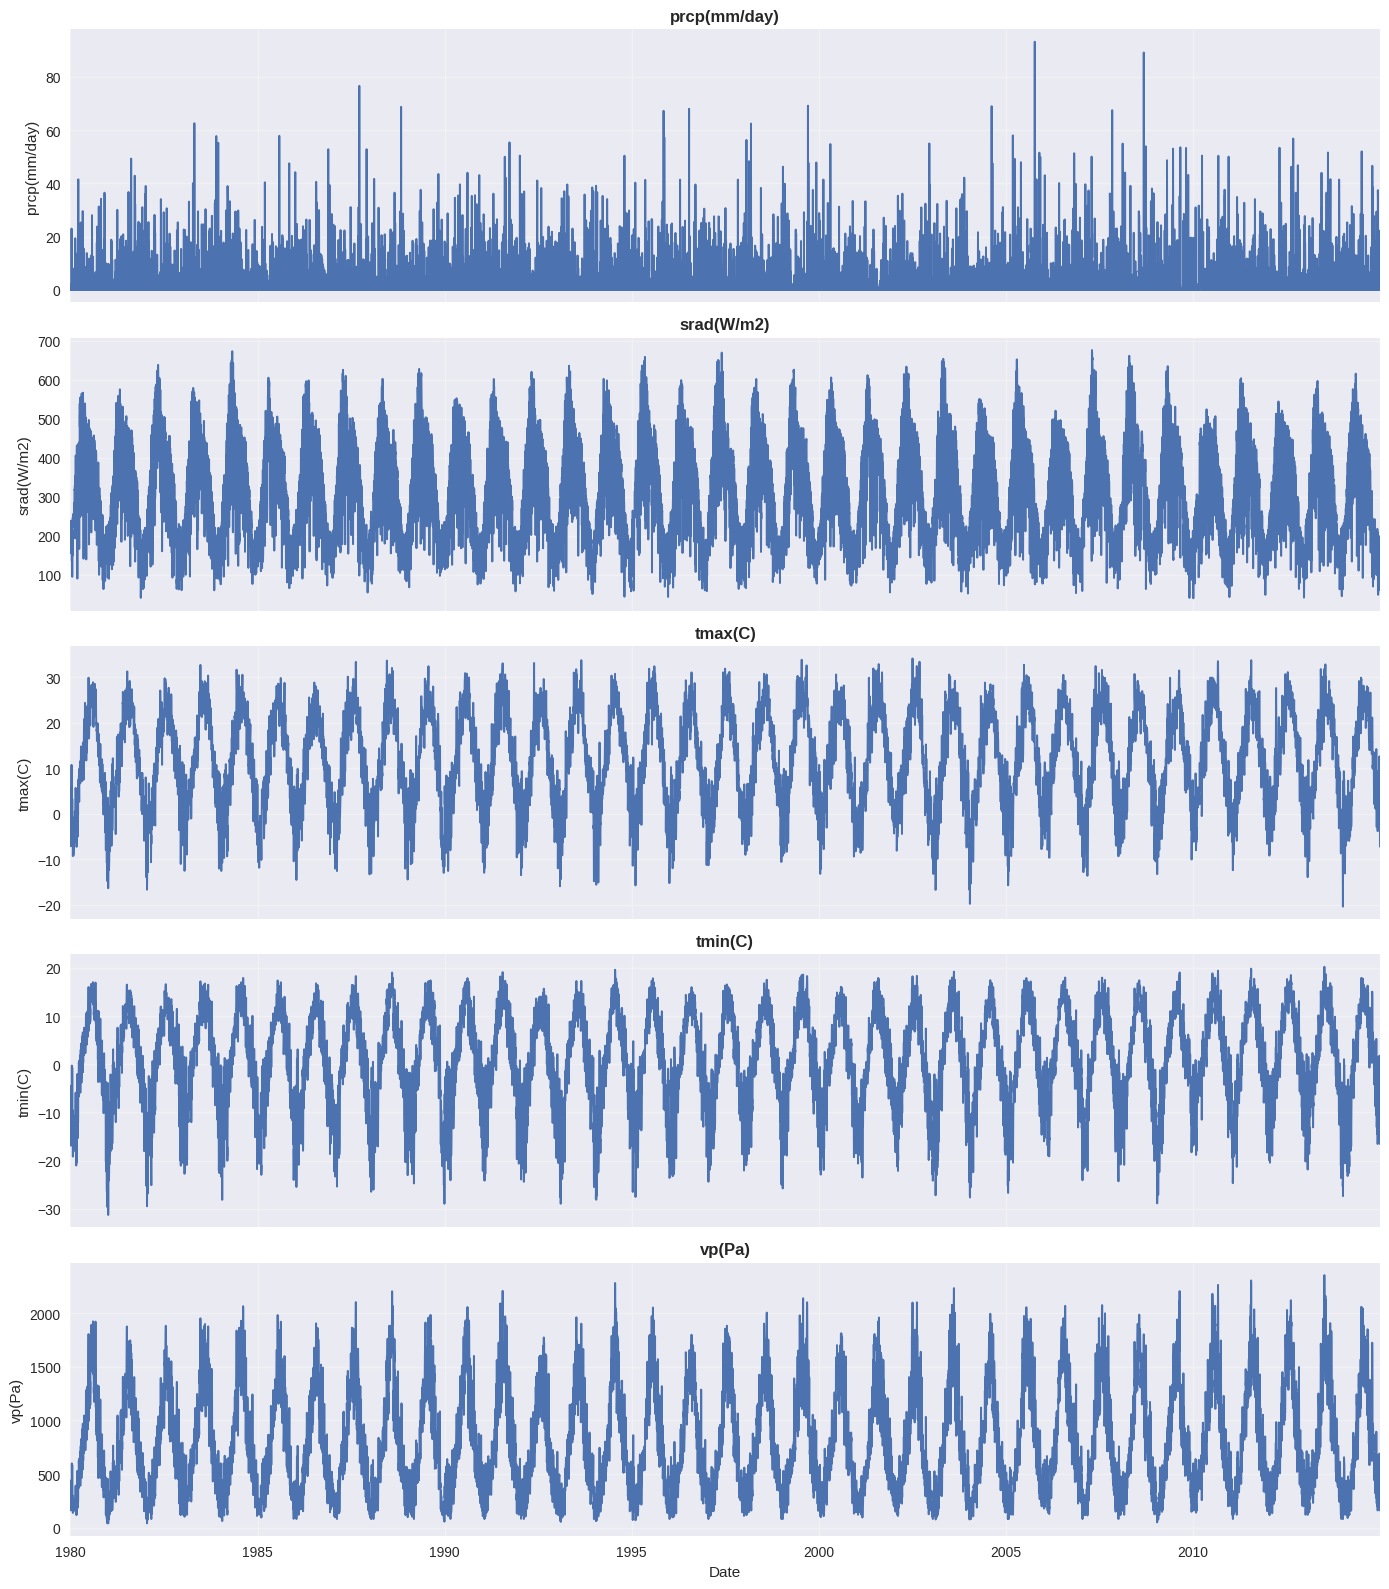

In [26]:
plt.style.use('seaborn-v0_8')   # clean aesthetic theme

if forcing_file.exists():
    df = pd.read_csv(forcing_file, delim_whitespace=True, skiprows=3)

    # build datetime index
    df['date'] = pd.to_datetime(df[['Year', 'Mnth', 'Day']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('date')

    # columns to plot (skip the date components + SWE)
    cols_to_skip = ['Year', 'Mnth', 'Day', 'Hr', 'swe(mm)','dayl(s)']
    plot_cols = [c for c in df.columns if c not in cols_to_skip]

    n = len(plot_cols)
    fig, axes = plt.subplots(n, 1, figsize=(14, 3.2 * n), sharex=True)

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, plot_cols):
        df[col].plot(ax=ax, linewidth=1.4)  # thicker lines look nicer
        ax.set_title(col, fontsize=12, fontweight="bold")
        ax.set_ylabel(col)
        ax.grid(alpha=0.3)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

---
# Part 4: Single Basin Training, Validation & Evaluation

## Workflow Overview:
1. **Training**: Model learns from historical data (1990-2008)
2. **Validation**: Monitor performance on held-out period (1980-1989)
3. **Evaluation**: Final test on unseen data (1989-1999)

## Create Configuration


In [40]:
config = {
    'experiment_name': 'single_basin_run',
    'run_dir': 'runs',

    # Basin files
    'train_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Single_basin.txt',
    'validation_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Single_basin.txt',
    'test_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Single_basin.txt',

    # Time periods
    'train_start_date': '01/10/1999',
    'train_end_date': '30/09/2008',
    'validation_start_date': '01/10/1980',
    'validation_end_date': '30/09/1989',
    'test_start_date': '01/10/1989',
    'test_end_date': '30/09/1999',

    # Hardware
    'device': device,

    # Validation settings
    'validate_every': 1,
    'validate_n_random_basins': 1,
    'metrics': ['NSE', 'KGE'],

    # Model architecture
    'model': 'cudalstm',
    'head': 'regression',
    'output_activation': 'linear',
    'hidden_size': 20,
    'initial_forget_bias': 3,
    'output_dropout': 0.4,

    # # Static embedding network
    # 'statics_embedding': {
    #     'type': 'fc',
    #     'hiddens': [30, 20, 64],
    #     'activation': 'tanh',
    #     'dropout': 0.0,
    # },

    # Dynamic embedding network
    'dynamics_embedding': {
        'type': 'fc',
        'hiddens': [30, 20, 64],
        'activation': 'tanh',
        'dropout': 0.0,
    },

    # Training settings
    'optimizer': 'Adam',
    'loss': 'NSE',
    'learning_rate': {0: 1e-2, 10: 5e-3, 20: 1e-3},
    'batch_size': 256,
    'epochs': 30,
    'clip_gradient_norm': 1,
    'target_noise_std': None,
    'save_weights_every': 1,

    # Sequence settings
    'predict_last_n': 1,
    'seq_length': 365,
    'num_workers': 2,
    'log_interval': 1,

    # Data settings
    'dataset': 'camels_us',
    'data_dir': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/CAMELS_US',
    'save_train_data': False,
    'train_data_file': None,
    'forcings': ['daymet'],
    'dynamic_inputs': [
        'prcp(mm/day)',
        'srad(W/m2)',
        'tmax(C)',
        'tmin(C)',
        'vp(Pa)'
    ],
    'target_variables': ['QObs(mm/d)'],
    'clip_targets_to_zero': ['QObs(mm/d)'],

    # 'static_attributes': [
    #     'p_mean',
    #     'pet_mean',
    #     'aridity',
    #     'p_seasonality',
    #     'high_prec_freq',
    #     'high_prec_dur',
    #     'low_prec_freq',
    #     'low_prec_dur',
    #     'elev_mean',
    #     'slope_mean',
    #     'area_gages2',
    #     'lai_max',
    #     'lai_diff',
    #     'gvf_max',
    #     'gvf_diff',
    #     'soil_depth_pelletier',
    #     'soil_depth_statsgo',
    #     'soil_porosity',
    #     'soil_conductivity',
    #     'max_water_content',
    #     'sand_frac',
    #     'silt_frac',
    #     'clay_frac',
    #     'geol_permeability'
    # ],

    'additional_feature_files': None,
    'evolving_attributes': None,
    'use_basin_id_encoding': False,
}

config_file = Path('single_basin_config.yml')
with open(config_file, 'w') as f:
    yaml.safe_dump(config, f)

print(f"✓ Configuration saved to {config_file}")


✓ Configuration saved to single_basin_config.yml


## Run Training
**Note**: Training prints loss and validation metrics every 5 epochs.


In [41]:
start_run(config_file=config_file)


# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


## Evaluate on Test Set


In [42]:
single_run_dir = sorted(Path("runs").glob("single_basin_run_*"))[-1]
print(f"Evaluating: {single_run_dir}")
eval_run(run_dir=single_run_dir, period="test")


Evaluating: runs/single_basin_run_2711_062346
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


## Visualize Results


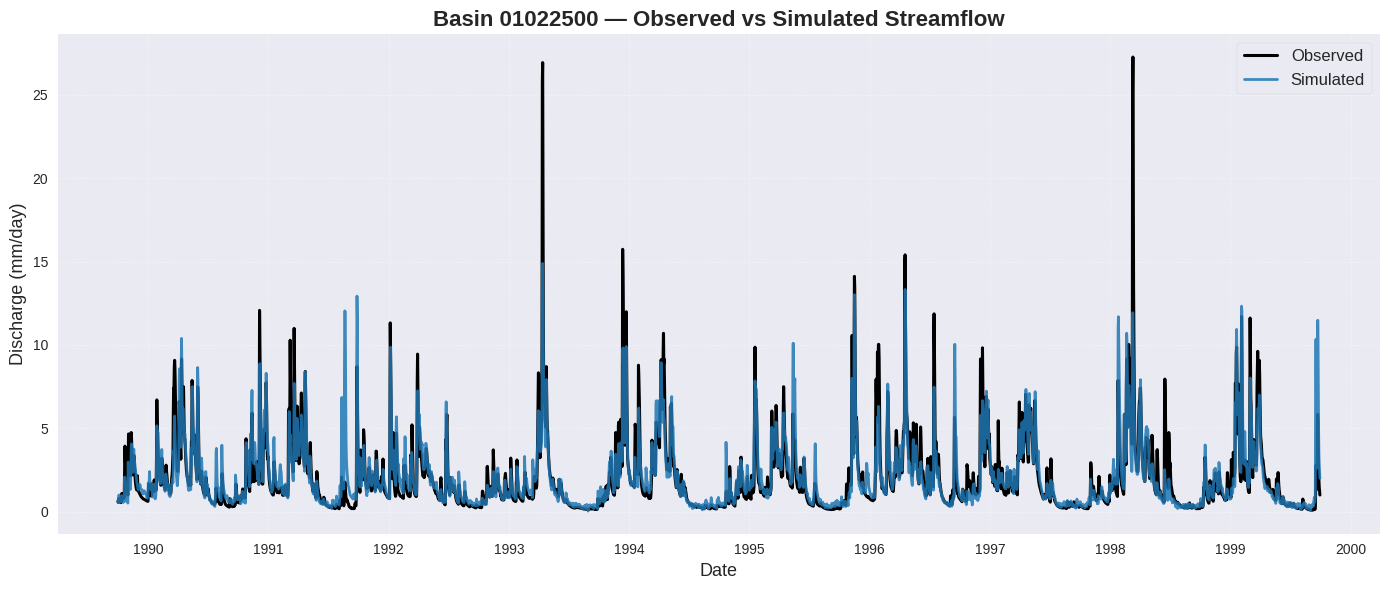

In [44]:
import matplotlib.pyplot as plt
import pickle

# Load results
results_file = single_run_dir / "test" / "model_epoch030" / "test_results.p"
with open(results_file, "rb") as f:
    results = pickle.load(f)

basin_results = results[basin_id]['1D']['xr']

# --- Sexy plot style ---
plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(figsize=(14, 6))

# Plot observed + simulated
basin_results['QObs(mm/d)_obs'].plot(
    ax=ax, label='Observed', linestyle='-', linewidth=2.2, color='black'
)
basin_results['QObs(mm/d)_sim'].plot(
    ax=ax, label='Simulated', linewidth=2.0, color='#1f77b4', alpha=0.85
)

# Labels and title
ax.set_title(f"Basin {basin_id} — Observed vs Simulated Streamflow", fontsize=16, fontweight='bold')
ax.set_ylabel("Discharge (mm/day)", fontsize=13)
ax.set_xlabel("Date", fontsize=13)

# Grid aesthetics
ax.grid(alpha=0.35, linestyle='--', linewidth=0.6)

# Legend
ax.legend(frameon=True, fontsize=12)

# Tight layout
plt.tight_layout()
plt.show()



---
# Part 5: Multi-Basin Training, Validation & Evaluation

## Why Multi-Basin Training?
Training on multiple basins allows the model to:
- **Generalize** across different hydrological regimes
- Learn **robust** rainfall-runoff relationships
- Leverage **static attributes** to distinguish basins

## Update Configuration for 2 Basins


In [52]:
config = {
    'experiment_name': 'multi_basin_run',
    'run_dir': 'runs',

    # Basin files
    'train_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Multi_basin.txt',
    'validation_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Multi_basin.txt',
    'test_basin_file': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/Multi_basin.txt',

    # Time periods
    'train_start_date': '01/10/1999',
    'train_end_date': '30/09/2008',
    'validation_start_date': '01/10/1980',
    'validation_end_date': '30/09/1989',
    'test_start_date': '01/10/1989',
    'test_end_date': '30/09/1999',

    # Hardware
    'device': device,

    # Validation settings
    'validate_every': 1,
    'validate_n_random_basins': 1,
    'metrics': ['NSE', 'KGE'],

    # Model architecture
    'model': 'cudalstm',
    'head': 'regression',
    'output_activation': 'linear',
    'hidden_size': 20,
    'initial_forget_bias': 3,
    'output_dropout': 0.4,

    # Static embedding network
    'statics_embedding': {
        'type': 'fc',
        'hiddens': [30, 20, 64],
        'activation': 'tanh',
        'dropout': 0.0,
    },

    # Dynamic embedding network
    'dynamics_embedding': {
        'type': 'fc',
        'hiddens': [30, 20, 64],
        'activation': 'tanh',
        'dropout': 0.0,
    },

    # Training settings
    'optimizer': 'Adam',
    'loss': 'NSE',
    'learning_rate': {0: 1e-2, 10: 5e-3, 20: 1e-3},
    'batch_size': 256,
    'epochs': 30,
    'clip_gradient_norm': 1,
    'target_noise_std': None,
    'save_weights_every': 1,

    # Sequence settings
    'predict_last_n': 1,
    'seq_length': 365,
    'num_workers': 2,
    'log_interval': 1,

    # Data settings
    'dataset': 'camels_us',
    'data_dir': '/content/drive/MyDrive/AI4DRM_NeuralHydrology_Tutorial_1/CAMELS_US',
    'save_train_data': False,
    'train_data_file': None,
    'forcings': ['daymet'],
    'dynamic_inputs': [
        'prcp(mm/day)',
        'srad(W/m2)',
        'tmax(C)',
        'tmin(C)',
        'vp(Pa)'
    ],
    'target_variables': ['QObs(mm/d)'],
    'clip_targets_to_zero': ['QObs(mm/d)'],

    'static_attributes': [
        'p_mean',
        'pet_mean',
        'aridity',
        'p_seasonality',
        'high_prec_freq',
        'high_prec_dur',
        'low_prec_freq',
        'low_prec_dur',
        'elev_mean',
        'slope_mean',
        'area_gages2',
        'lai_max',
        'lai_diff',
        'gvf_max',
        'gvf_diff',
        'soil_depth_pelletier',
        'soil_depth_statsgo',
        'soil_porosity',
        'soil_conductivity',
        'max_water_content',
        'sand_frac',
        'silt_frac',
        'clay_frac',
        'geol_permeability'
    ],

    'additional_feature_files': None,
    'evolving_attributes': None,
    'use_basin_id_encoding': False,
}

multi_config_file = Path('multi_basin_config.yml')
with open(multi_config_file, 'w') as f:
    yaml.safe_dump(config, f)

print(f"✓ Configuration saved to {multi_config_file}")


✓ Configuration saved to multi_basin_config.yml


## Run Multi-Basin Training


In [53]:
start_run(config_file=multi_config_file)


# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


## Evaluate Multi-Basin Model


In [54]:
multi_run_dir = sorted(Path("runs").glob("multi_basin_run_*"))[-1]
print(f"Evaluating: {multi_run_dir}")
eval_run(run_dir=multi_run_dir, period="test")


Evaluating: runs/multi_basin_run_2711_062740
# Evaluation: 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


## Compare Single vs Multi-Basin Performance


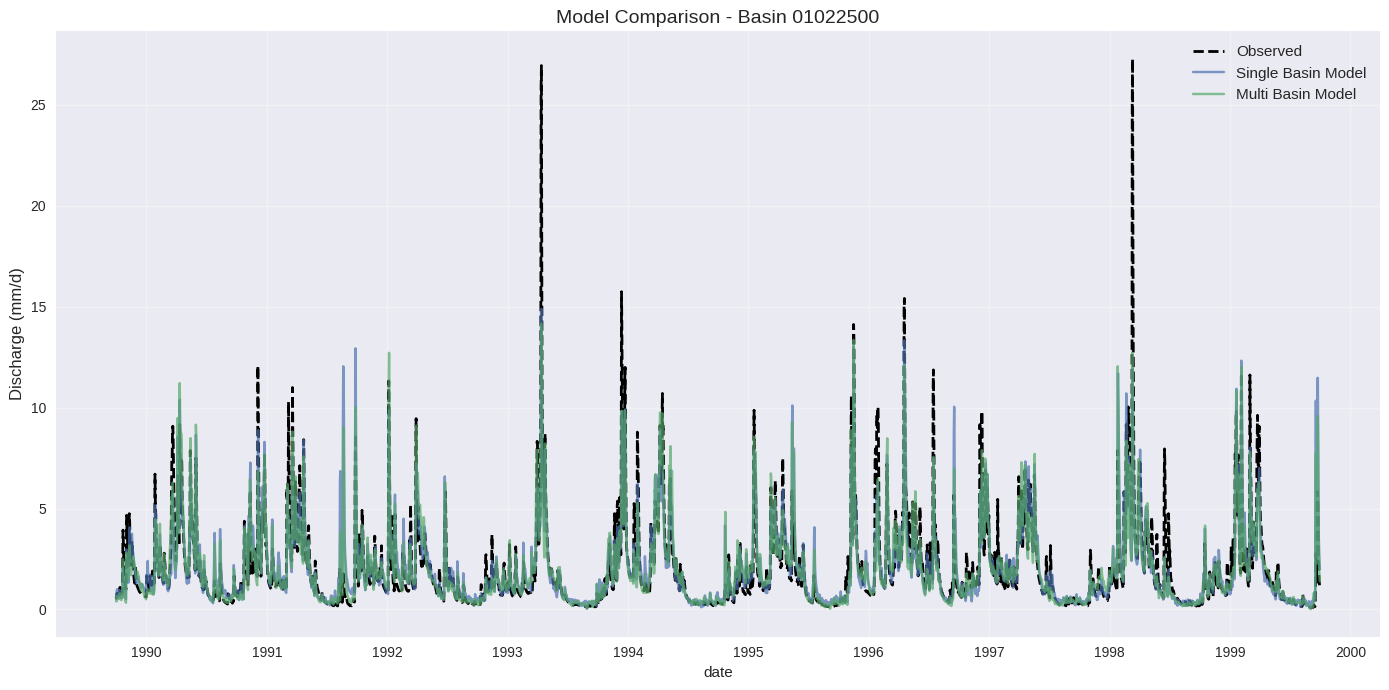

In [55]:
# Load both results
def load_results(run_dir, basin_id):
    results_file = run_dir / "test" / "model_epoch030" / "test_results.p"
    with open(results_file, "rb") as f:
        results = pickle.load(f)
    return results[basin_id]['1D']['xr']

single_results = load_results(single_run_dir, basin_id)
multi_results = load_results(multi_run_dir, basin_id)

# Plot comparison
fig, ax = plt.subplots(figsize=(14, 7))
single_results['QObs(mm/d)_obs'].plot(ax=ax, label='Observed', color='black', linestyle='--', linewidth=2)
single_results['QObs(mm/d)_sim'].plot(ax=ax, label='Single Basin Model', alpha=0.7)
multi_results['QObs(mm/d)_sim'].plot(ax=ax, label='Multi Basin Model', alpha=0.7)

ax.set_title(f"Model Comparison - Basin {basin_id}", fontsize=14)
ax.set_ylabel("Discharge (mm/d)", fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()
